# Unsupervised Learning Predict Solution

© Explore Data Science Academy

---
### Honour Code

We, {**TEAM_ND2**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work as a Team and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.


## PROJECT INTRODUCTION
----

> Personalization.

> The Holy Grail of the Internet.

Gone are the days when anonymous shoppers browsed generic stock for an elusive item. Today, anyone can serve customers unlimited, personalized offers tailored to their interests.

With all the options online, you need a system that narrows down the possibilities. Something that learns what people like. *That’s where recommender systems come into play.*

The largest movie libraries in the world are all digitized and transferred to online streaming services, like Netflix, HBO, or YouTube. Enhanced with AI-powered tools, these platforms can now assist us with probably the most difficult chore of all — picking a movie.

> Did you know that almost 80% of Netflix users follow the title recommendations offered by its algorithms ?

 A movie recommendation system, or a movie recommender system, is an ML-based approach to filtering or predicting the users’ film preferences based on their past choices and behavior. It’s an advanced filtration mechanism that predicts the possible movie choices of the concerned user and their preferences towards a domain-specific item. Filtering for Recommenders system can either be Collaborative based, content based or a hybrid which implements both.
 
 
<img src="https://imgs.search.brave.com/6z-A4dgupg9g-pVZkJM2OKR0WLD-AVLxSJgX73_Bf0s/rs:fit:1024:655:1/g:ce/aHR0cHM6Ly9uZW90/ZXJpYy5ldS93cC1j/b250ZW50L3VwbG9h/ZHMvMjAxOS8wOC9O/ZXRmbGl4LVJlY29t/bWVuZGF0aW9ucy0x/MDI0eDY1NS5qcGc" width="700">


With Recommendation systems;
* You do not need a market research to find out whether a customer is willing to purchase at a shop where they’re getting maximum help in scouting the right product. They’re also much more likely to return to such a shop in the future.

* Customer satisfaction leads to customer retention.
When customers leaves a website and come back later, it would help if their browsing data from the previous session was available. This could further help and guide their e-Commerce activities. This type of customer satisfaction leads to customer retention.

* We often take recommendations from friends and family because we trust their opinion. They know what we like better than anyone else. This is the sole reason they are good at recommending things and this is what recommendation systems try to model. 


In this project, we try to implement a Movie Recommendation system, using both collaborative and content based approach. 






### Data Sources

 > Datasets used consist of several million 5-star ratings obtained from users of the online MovieLens movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems.

> For this Predict project, we'll be using a special version of the MovieLens dataset which has been enriched with additional data, and resampled for fair evaluation purposes.

> The data for the MovieLens dataset is maintained by the GroupLens research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from IMDB.

## Problem Statement

---
> In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.



Many companies that offer environmentally friendly products and services would like to determine how people perceive climate change and whether or not they believe it is a real threat. They are seeking a machine learning model that can classify a person's belief in climate change based on their tweet data, in order to increase their market research efforts and inform future marketing strategies.

<a id="cont"></a>

## Project Pipeline
---

> The various steps involved in this project are :

<a href=#zero>0. Create a connection to comet_ml </a>

<a href=#one>1. Import Necessary Dependencies </a>

<a href=#two>2. Loading Data </a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Visualization of Target Variables </a>

<a href=#five>5. Data Preprocessing </a> 

<a href=#six>6. Transforming Dataset using TF-IDF Vectorizer </a>

<a href=#seven>7. Splitting our data into Train and Test Subset </a>

<a href=#eight>8. Model Building </a>

<a href=#nine>9. Model Performance</a>

<a href=#ten>10. Model Explanations</a>

<a href=#eleven>11. Logging Params on Comet </a>

<a href=#twelve>12. Pickling of models and vectorizer </a>

<a href=#thirteen>13. Conclusion </a>

<a href=#fourteen>14. Reference </a>


 <a id="zero"></a>
##  0. Create a connection to comet_ml
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

In [93]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="AwtbkJsBi9bHzgoEZ5WfBb2AA",
    project_name="the-cudar-project",
    workspace="jasperzeroes",
)


COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET INFO: Experiment is live on comet.com https://www.comet.com/jasperzeroes/the-cudar-project/9a5cc27854c94d10b491483eef335734

COMET WARNING: The given value of the metric sys.load.avg was None; ignoring


 <a id="one"></a>
## 1. Importing Necessary Dependencies
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
# Libraries for Natural Language Processing
import nltk
from nltk.corpus import stopwords
# Libraries for data preparation and model building
import csv
import surprise
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# Libraries for Model Performance and Evaluation
from surprise.model_selection import KFold, GridSearchCV, cross_validate
from surprise import accuracy, SVD, SVDpp, Dataset, NormalPredictor, Reader
#Library to pickle a model
import pickle

import warnings
warnings.filterwarnings('ignore')


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>


Load necessary csv files containing data

> We are provided with the following datasets namely;


* **movies.csv** - Contain movie information such as movieId, movie title and genre.

* **train.csv** - The training split of the dataset. Contains user and movie IDs with associated ratings and Timestamps. Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970. 

* **test.csv** - The test split of the dataset. Contains user and movie IDs with no rating data and will be used to make the final prediction, on Kaggle, to see how well the models perform on unseen data.

---

In [69]:
# Load and view structure of the datasets
movies = pd.read_csv('resources/data/movies.csv')
#ratings = pd.read_csv('resources/data/ratings_lit.csv')
train = pd.read_csv('resources/data/train.csv')
test = pd.read_csv('resources/data/test.csv')

In [9]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


The "genres column" of the dataframe contains special characters (vertical lines). Also, words in the 'title and genres columns' begin with uppercase letters. The objectives will be to remove these special characters and that would otherwise consume computational resources as well as converting all our words to lowercase letters in the **Data Preprocessing section** of this notebook.

In [6]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [8]:
test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>


<img src="https://imgs.search.brave.com/nPNv6ju12upBCEiinjTg9aZQLyPKzZTkpHewmoo0aI8/rs:fit:750:360:1/g:ce/aHR0cHM6Ly93d3cu/YW5hbHl0aWNzc3Rl/cHMuY29tL2JhY2tl/bmQvbWVkaWEvdGh1/bWJuYWlsLzMxNTc5/NzcvODAwNjU1MV8x/NTg3MzI0Njk2X2Rh/dGElMjBhbmFseXNp/cy5qcGc" width="400">



> In this section,  data sets will be analyzed to find patterns, tell insights, and summarize their main characteristics, often with visual methods and an in-depth analysis of all the variables in the DataFrame. This helps for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.


In [10]:
# Check dimension
# movies
movies.shape

(62423, 3)

There are about 62,000 row counts and 3 columns in the movie dataset

In [13]:
# Check for nulls
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

There are no null values in the movie dataset

In [18]:
# Check for duplicates in each column of the movie dataset
# movie Id
movies["movieId"].duplicated().sum()

0

There are no duplicate movieId

In [21]:
# title
movies["title"].duplicated().sum()

98

Since there are no duplicate movieId's but there exist duplicates in movie titles, we need to drop the duplicate titles with their movieId

In [26]:
# train
train.shape

(10000038, 4)

There are about 10 million row counts and 4 columns in the train dataset

In [27]:
# Check for nulls
train.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

There are no null values in the train dataset

In [128]:
# Check datatype for timestamp
train['timestamp'].dtype

dtype('int64')

# Take note of this

Our timestamp datatype is given int64. Convert to datetime datatype in the Data preprocessing section of this notebook

In [59]:
# Group the data by userId and get the average rating and frequency
rating_frequency = train.groupby(["userId"]).agg({'rating': ['mean', 'size']})

# Rename the columns
rating_frequency.columns = ['average_rating', 'frequency']

# Move the userId column from the index to a column
rating_frequency = rating_frequency.reset_index()

# Rename the userId column
rating_frequency = rating_frequency.rename(columns={'userId':'user_id'})

# sort by descending order
rating_frequency = rating_frequency.sort_values(by='frequency',ascending=False)

# View the dataframe
rating_frequency.head()

,user_id,average_rating,frequency
72314,72315,3.092380,12952
80973,80974,3.277582,3680
137292,137293,3.192168,3588
33843,33844,2.583853,3208
20054,20055,3.179016,3050


In [67]:
# You can do the above with this line of code
#rating_freq = train.groupby(['userId']).agg({'rating': ['mean', 'size']}).reset_index().rename(columns={'userId':'user_id', 'rating': 'average_rating', 'size':'frequency'})

In [80]:
rating_frequency.tail()  # Remember to remove users with less than 
#20 rating frequency (i.e users who have rated less than 20 movies). Also include a reason for removing them

,user_id,average_rating,frequency
79086,79087,4.5,1
53639,53640,4.0,1
105713,105714,2.0,1
121070,121071,4.0,1
55361,55362,3.5,1


In [70]:
# To check for freq of rating by genres, we need to first merge the two dataframes
merged_df = movies.merge(train, on="movieId")

# View merged dataframe
merged_df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,158849,5.0,994716786
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,97203,5.0,942683155
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,161871,3.0,833104576
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,45117,4.0,1442256969
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,27431,5.0,849667827


In [77]:
# Group the data by genres and get the average rating and frequency
genre_frequency = merged_df.groupby(["genres"]).agg({'rating': ['mean', 'size']})

# Rename the columns
genre_frequency.columns = ['average_rating', 'frequency']

# sort by descending order
genre_frequency = genre_frequency.sort_values(by='frequency',ascending=False)

# View the dataframe
genre_frequency.head()

,average_rating,frequency
genres,,
Drama,3.692465,706335
Comedy,3.247779,606057
Comedy|Romance,3.374743,360826
Drama|Romance,3.668020,318408
Comedy|Drama,3.567830,288847


# You can plot the above table as a histogram showing the distribution using 

hashtags[:50].plot(fontsize=15,figsize  = (15,7), kind='bar',y='occurences',x='hashtag')
plt.xticks(rotation = 75)
plt.tight_layout()
plt.grid(False)
plt.suptitle('Top 50 Hashtags for Climate Change Tweets', fontsize=20);

Clearly this shows there is an imbalance in the frequency of occurrence for each class. Imbalance occurs when there is an uneven distribution of the various observations. Since the training dataset has more observations for 'pro' and least observation for 'anti', this imbalance will likely produce a model that performs well on predicting 'pro' tweets and performs worse on predicting anti tweets. This shouldn't come as a surprise since our model was fed more with pro tweets and least with anti tweets. Remember, for a dataset with imbalanced classes, something like F1-score is a better choice for model evaluation.

In [78]:
genre_frequency.tail()

,average_rating,frequency
genres,,
Action|Adventure|Drama|Horror|Sci-Fi,0.5,1
Crime|Fantasy|Mystery,0.5,1
Action|Crime|Mystery|Romance|Sci-Fi|Thriller,3.0,1
Action|Children|Comedy|Drama,3.0,1
Action|Adventure|Crime|Drama|Fantasy|Horror|Mystery,2.5,1


As can be seen, the 3 highest rated movie genres are 

* Drama, 
* Comedy, and 
* Romance

While the 3 least rated movie genres, in no particular order, are 

* Action|Adventure|Drama|Horror|Sci-Fi, 
* Crime|Fantasy|Mystery, and 
* Action|Crime|Mystery|Romance|Sci-Fi|Thrille . 

Since some movies have more rating frequency than others, we need to normalise our dataset

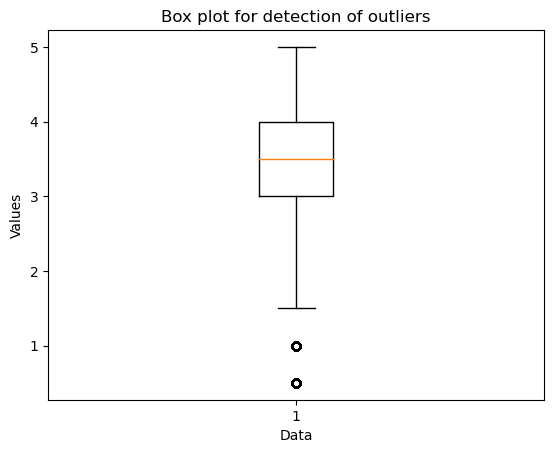

In [87]:
# Check for Outliers in the 'rating column' of the train dataset
# Draw a box plot
plt.boxplot(np.array(train["rating"]))

# Add a title and labels
plt.title('Box plot for detection of outliers')
plt.xlabel('Data')
plt.ylabel('Values')

# Display the plot
plt.show()


As can be seen, there are clusters of datapoints that are considered outliers in the train dataset

# Explain in brief the value of the 5 number summary and don't forget to remove the outliers in the Feature engineering and data cleaning

In [104]:
# Calculate the z-scores
z_scores = np.abs(stats.zscore(np.array(train["rating"])))

# Create a dataframe of the z_scores
z_score_df = pd.DataFrame(z_scores, columns=["z_rating"])
z_score_df.head()

,z_rating
0,0.439727
1,0.910925
2,1.382124
3,1.445067
4,0.502670


In [121]:
# Get min and max threshold for outliers
z_score_df.describe()

,z_rating
count,1.000004e+07
mean,7.932283e-01
std,6.089243e-01
min,3.147151e-02
25%,4.397269e-01
50%,5.026700e-01
75%,1.382124e+00
max,2.858662e+00


The min and max threshold corresponds to the min and max zscores from the dataframe above. Define a threshold - min and max threshold, to detect and remove outliers.

Any data point with a z-score greater than the max threshold or lesser than the min threshold, is considered an outlier.

# Don't forget this is Data Manipulation, Data cleaning and Data Engineering section 

In [123]:
# Define the min and max threshold
min_threshold = 0.03147151
max_threshold = 2.858662

# Find the outliers
min_outliers = np.where(z_score < min_threshold)
max_outliers = np.where(z_score > max_threshold)

# Store the index of the outliers in a list
min_outlier_indexes = min_outliers[0]
max_outlier_indexes = max_outliers[0]
#print(outlier_indexes)

# drop the outliers from the dataframe
train_without_outliers = train.drop(min_outlier_indexes)
train_without_outliers = train_without_outliers.drop(max_outlier_indexes)

In [124]:
print("Length of train dataframe before removing outliers :", len(train))
print("Length of train dataframe after removing outliers :", len(train_without_outliers))
print("There are about",len(train) - len(train_without_outliers),"outlier datapoints in the train dataset")

Length of train dataframe before removing outliers : 10000038
Length of train dataframe after removing outliers : 8571825
There are about 1428213 outlier datapoints in the train dataset


In [125]:
train_without_outliers.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


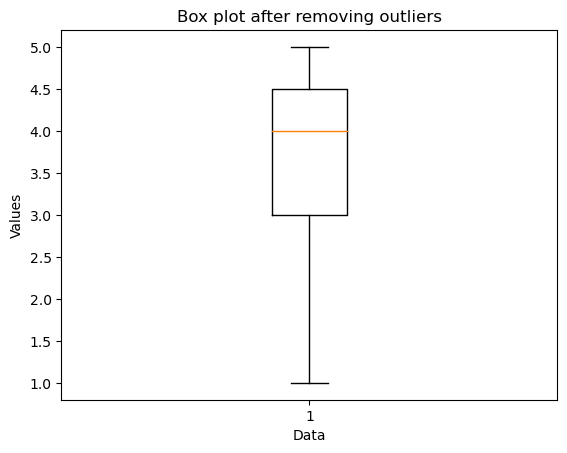

In [126]:
# Check to see if Outliers were removed successfully
# Draw a box plot
plt.boxplot(np.array(train_without_outliers["rating"]))

# Add a title and labels
plt.title('Box plot after removing outliers')
plt.xlabel('Data')
plt.ylabel('Values')

# Display the plot
plt.show()

 As can be seen from the boxplot above, the outliers were removed successfully. There are no more outliers in the train dataset

# Scatter plot for Ratings and Timestamp 

The scatter plot can display the relationship between the ratings and the timestamp, then see if there is any correlation between the two variables.

In [137]:
# Convert the timestamp column to datetime
train['timestamp'] = pd.to_datetime(train['timestamp'], unit='s')

# Check if timestamp conversion was successful
train['timestamp'].dtype

dtype('<M8[ns]')

The datatype for "timestamp"has been converted from int64 to datetime

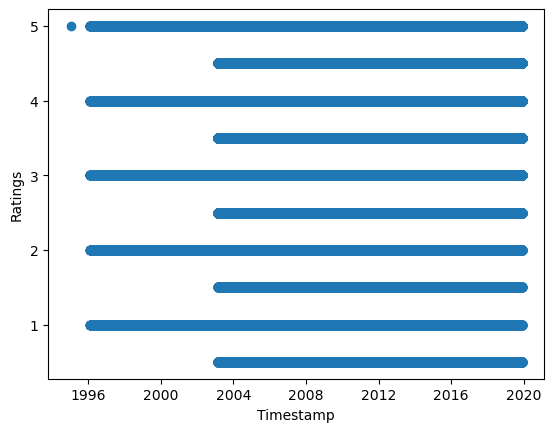

In [134]:
# Scatter plot of ratings vs timestamp
plt.scatter(train['timestamp'], train['rating'])
plt.xlabel('Timestamp')
plt.ylabel('Ratings')
plt.show()


<AxesSubplot: xlabel='timestamp', ylabel='rating'>

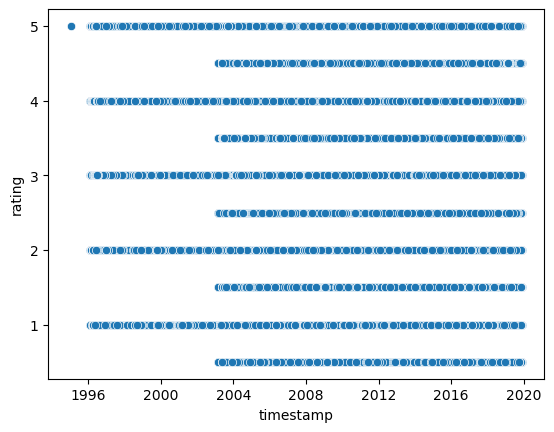

In [136]:

import seaborn as sns

# Scatter plot of ratings vs timestamp
sns.scatterplot(x='timestamp', y='rating', data=train)

<a id="four"></a>
## 4. Data Visualization of Target Variables
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

### Word Cloud


Use word cloud for genres after splitting them up and see the most prominent genre word.

Word clouds (also known as text clouds or tag clouds) work in a simple way: the more a specific word appears in a source of textual data (such as a speech, blog post, or database), the bigger and bolder it appears in the word cloud.

A word cloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.


In [28]:
# Start with one review:
#classifying the tweets into it's category class
pro = df_train[df_train['sentiment']==1]
neutral = df_train[df_train['sentiment']==0]
news = df_train[df_train['sentiment']==2]
anti = df_train[df_train['sentiment']==-1]

In [29]:
#looping through each category of the tweet and joining it as a string
all_tweets = " ".join(word for word in df_train.message)
pro_tweets = " ".join(word for word in pro.message)
neutral_tweets = " ".join(word for word in neutral.message)
news_tweets = " ".join(word for word in news.message)
anti_tweets = " ".join(word for word in anti.message)

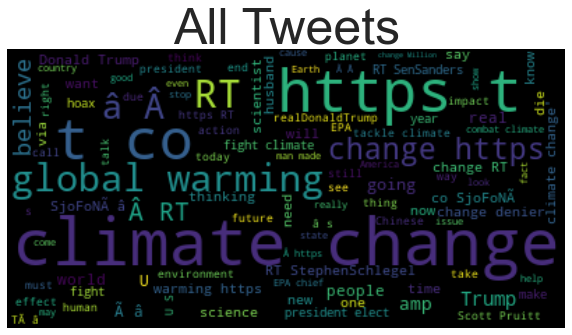

In [30]:
fig, ax = plt.subplots(1, 1, figsize  = (10,10))
# Create and generate a word cloud image:
wordcloud_all = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(all_tweets)
# Display the generated image:
ax.imshow(wordcloud_all, interpolation='bilinear')
ax.set_title('All Tweets', fontsize=50)
ax.axis('off');

- Words like "climate change" and "global warming" that are general terms connected to discussions about climate change appear in all categories.
- The performance of the classification model is likely to be unaffected by the removal of such stopwords and words that appear in all categories.
- Because the objective is to determine whether there is a positive sentiment or not, it is imperative to reduce the categories in the sentiment feature.

<a id="five"></a>
## 5. Data Preprocessing
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>


In this section of text analytics, removing noise (i.e. unneccesary information) is a key part of getting the data into a usable format.

<img src="https://imgs.search.brave.com/sxwy8lWRY4tbRTAWP5AcgKawD8y9mqR67LUK3ICd33A/rs:fit:768:432:1/g:ce/aHR0cHM6Ly9jZG4u/c2xpZGVzaGFyZWNk/bi5jb20vc3NfdGh1/bWJuYWlscy9kYXRh/cHJlcHJvY2Vzc2lu/Zy1zYW5kZWVwcGF0/aWwtMTkwMzA1MDg0/MjI3LXRodW1ibmFp/bC00LmpwZz9jYj0x/NTUxNzc1NjEz" width="400">

For the train and movies datasets, the following steps will be carried out:

* removing special character
* removing numbers
* convert text to lower case


The ***text_preproc*** function changes all the contradictions (*e.g don't **to** do not **and** there's **to** there is*), and removes extra whitespaces

* After thorough cleaning and engineering new feature, the dataframe now has an extra columns containing texts to be used for modelling and making predictions.

The dataframe looks cleaned, pruned and proper. 

Next, convert the texts into tokens through a process called **tokenization**, remove stop words, **stemmatize** and **lemmatize** the tokens

* Tokenization is a way of separating a piece of text into smaller units called tokens, which can be either words, characters, or subwords.
* Stemmatization works by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found in an inflected word.

* Lemmatization, on the other hand, takes into consideration the contextual meaning of the words.


Instead of doing all the above named processes manually and one after the other, one can use a TFIDF vectorizer to do it once.

<a id="six"></a>
## 6. Transforming Dataset using TF-IDF Vectorizer
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

TF-IDF is short for Term frequency-Inverse Document Frequency.

**TF** is a measure of how often a phrase appears in a document, and **IDF** is about how important that phrase is.
The TF-IDF algorithm is used to weigh a keyword in any content and assign importance to that keyword based on the number of times it appears in the document.


# Don't forget to normalise too

In [40]:
# create features and target dataset
x = np.array(df_train['clean_message'])
y = np.array(df_train['sentiment'])

**TF-IDF weighting**

In [41]:
#Create a TF-IDF object instance
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)

**Create features and target variable**

<a id="seven"></a>
## 7. Splitting our data into Train and Test Subset
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

The **Pareto Principle** is also called the 80/20 rule. The general point is that, in most cases, 80% of effects come from 20% of causes. So we'll split our data according to this principle.

In [42]:
#Pareto Principle Split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size= 0.2,
                                                    random_state= 42)

<a id="eight"></a>
## 8. Model Building
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

---

This is the place where we create the main juice. This is the place for which all data preparation was done. We have hundreds of algorithms. These algorithms are developed by various researchers and most of them are freely available for our implementation.During model creation, we need to develop different models with different sets of hyperparameters. For model development, we need the following steps.

* Select an algorithm and create multiple models with their default hyperparameters.
* Establish metrics for model performance. Model performance metrics can be f1_score, accuracy, recall, precision, roc-auc, etc.
* create multiple models with a winning algorithm and fine tune hyperparameters.
* Check the model performance on the train dataset.



<img src="https://imgs.search.brave.com/kvRbwXzThu7-jN1wyZvQAlCG3OZm2LBm3kEqGkrE5Vo/rs:fit:1024:683:1/g:ce/aHR0cHM6Ly93d3cu/aW50YWNzLmNvbS93/cC1jb250ZW50L3Vw/bG9hZHMvMjAyMC8x/MC9idWlsZC1jdXN0/b20tbW9kZWxzLXdp/dGgtYXp1cmUtbWFj/aGluZS1sZWFybmlu/Zy1kZXNpZ25lci0x/MDI0eDY4My5qcGc" width="500" >

 We'll make use of the following models to classify the polarity of tweets present in our dataset;

* Naive Bayes
* LogisticsRegression Classifier
* DecisionTree Classifier
* RandomForest Classifier
* Support Vector Machine Classifier
* Linear Support Vector Machine Classifier
* Ridge Classifier

---

#### Create Multiple Models

In [43]:
# NaiveBayes classifier
nby = MultinomialNB()
# Train model
nby.fit(X_train, y_train)
# Make predictions
nby_pred = nby.predict(X_test)

In [44]:
#LogisticRegression classifier
lr = LogisticRegression()
# Train model
lr.fit(X_train, y_train)
# Make predictions
lr_pred = lr.predict(X_test)

In [45]:
#DecisionTree classifier
dtc = DecisionTreeClassifier()
# Train model
dtc.fit(X_train, y_train)
# Make predictions
dtc_pred = dtc.predict(X_test)

In [46]:
#RandomForest classifier
rf = RandomForestClassifier()
# Train model
rf.fit(X_train, y_train)
# Make predictions
rf_pred = dtc.predict(X_test)

COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring


In [47]:
#Support Vector Machine
svc = SVC(C=5)
# Train model
svc.fit(X_train, y_train)
# Make predictions
svc_pred = svc.predict(X_test)

COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring
COMET WARNING: The given value of the metric sys.load.avg was None; ignoring


In [48]:
#Linear Support Vector Machine
svm = LinearSVC(C=0.7)
# Train model
svm.fit(X_train, y_train)
# Make predictions
svm_pred = svm.predict(X_test)

In [49]:
#Ridge Classifier
rc = RidgeClassifier(alpha=2.5)
# Train model
rc.fit(X_train, y_train)
# Make predictions
rc_pred = rc.predict(X_test)

<a id="nine"></a>
## 9. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>


<img src="https://imgs.search.brave.com/43umOrkBjx31omvA7djaPP7q95QPROyX4XIcXZreQGM/rs:fit:676:403:1/g:ce/aHR0cHM6Ly9jZG4u/c2hvcGlmeS5jb20v/cy9maWxlcy8xLzA3/MTQvNTA2MS9wcm9k/dWN0cy9UUFRFLTEw/MDMtVFAtTW9kZWxf/em9vbV81ODB4QDJ4/LmpwZz92PTE0MTg2/Mjg3MTM" width="400">

---

The metrics used to evaluate the performance of the various models are ;

1. Accuracy , Precision , Recall and F1 scores              
2. Confusion Matrix
3. Classification Report


**Accuracy** is the ratio of the correctly predicted classifications (both True Positives + True Negatives) to the total Test Dataset.

> In other words, accuracy answers the following question:
How many tweets did the model correctly classify out of all the tweets?

 **Precision** is the ratio of correctly predicted positive observations (True Positives) to the model’s total predicted positive observations, both correct (True Positives) and incorrect (False Positives).

> In other words, precision answers the following question:
How many of those tweets labelled by the model as 'Pro' are actually 'Pro' ?

 **Recall** is the ratio of correctly predicted positive observations (True Positives) to all observations in the actual class (Actual Positives).

> In other words, recall answers the following question:
Of all the tweets that are 'Pro', how many of those did the model correctly classify as 'Pro' ?

 
 **F1 score** is the weighted average of Precision and Recall. Therefore, this score takes both False Positives and False Negatives into account to strike a balance between precision and Recall. 
> F1 Score is a better measure to use if we need to seek a balance between Precision and Recall _and_ there is an uneven class distribution (remember our dataset contains large number of 'Pro' tweets compared to the rest class ).


### 9.1.  Assessing Model Performance using F1, Recall and Precision Scores

* Calculate the scores for the 7 models and display on a graph

In [50]:
print('     Performance metrics for Naive Bayes model')
print('*' * 50)
print('F1 score: ',f1_score(y_test, nby_pred, average="micro"))
print('Recall score: ', recall_score(y_test, nby_pred, average="micro"))
print('Precison score: ', precision_score(y_test, nby_pred, average="micro"))
print('*' * 50)

     Performance metrics for Naive Bayes model
**************************************************
F1 score:  0.6946902654867256
Recall score:  0.6946902654867256
Precison score:  0.6946902654867256
**************************************************


In [51]:
print('     Performance metrics for Logistics model')
print('*' * 50)
print('F1 score: ',f1_score(y_test, lr_pred, average="micro"))
print('Recall score: ', recall_score(y_test, lr_pred, average="micro"))
print('Precison score: ', precision_score(y_test, lr_pred, average="micro"))
print('*' * 50)

     Performance metrics for Logistics model
**************************************************
F1 score:  0.7487357774968394
Recall score:  0.7487357774968394
Precison score:  0.7487357774968394
**************************************************


In [52]:
print('     Performance metrics for Decision Tree model')
print('*' * 50)
print('F1 score: ',f1_score(y_test, dtc_pred, average="micro"))
print('Recall score: ', recall_score(y_test, dtc_pred, average="micro"))
print('Precison score: ', precision_score(y_test, dtc_pred, average="micro"))
print('*' * 50)

     Performance metrics for Decision Tree model
**************************************************
F1 score:  0.618204804045512
Recall score:  0.618204804045512
Precison score:  0.618204804045512
**************************************************


In [53]:
print('     Performance metrics for Random Forest model')
print('*' * 50)
print('F1 score: ',f1_score(y_test, rf_pred, average="micro"))
print('Recall score: ', recall_score(y_test, rf_pred, average="micro"))
print('Precison score: ', precision_score(y_test, rf_pred, average="micro"))
print('*' * 50)

     Performance metrics for Random Forest model
**************************************************
F1 score:  0.618204804045512
Recall score:  0.618204804045512
Precison score:  0.618204804045512
**************************************************


In [54]:
print('     Performance metrics for Support Vector Machine model')
print('*' * 60)
print('F1 score: ',f1_score(y_test, svc_pred, average="micro"))
print('Recall score: ', recall_score(y_test, svc_pred, average="micro"))
print('Precison score: ', precision_score(y_test, svc_pred, average="micro"))
print('*' * 60)

     Performance metrics for Support Vector Machine model
************************************************************
F1 score:  0.7664348925410872
Recall score:  0.7664348925410872
Precison score:  0.7664348925410872
************************************************************


In [55]:
print(' Performance metrics for Linear Support Vector Machine model')
print('*' * 60)
print('F1 score: ',f1_score(y_test, svm_pred, average="micro"))
print('Recall score: ', recall_score(y_test, svm_pred, average="micro"))
print('Precison score: ', precision_score(y_test, svm_pred, average="micro"))
print('*' * 60)

 Performance metrics for Linear Support Vector Machine model
************************************************************
F1 score:  0.7462073324905182
Recall score:  0.7462073324905183
Precison score:  0.7462073324905183
************************************************************


In [56]:
print('     Performance metrics for Ridge model')
print('*' * 50)
print('F1 score: ',f1_score(y_test, rc_pred, average="micro"))
print('Recall score: ', recall_score(y_test, rc_pred, average="micro"))
print('Precison score: ', precision_score(y_test, rc_pred, average="micro"))
print('*' * 50)

     Performance metrics for Ridge model
**************************************************
F1 score:  0.7493678887484196
Recall score:  0.7493678887484198
Precison score:  0.7493678887484198
**************************************************


COMET WARNING: The given value of the metric sys.load.avg was None; ignoring


### Let's visualize the scores on a bar chart

---

From the metrics above, the scores are the same so let's visualize the f1 score since it measures the weighted average of both recall and precision.

---

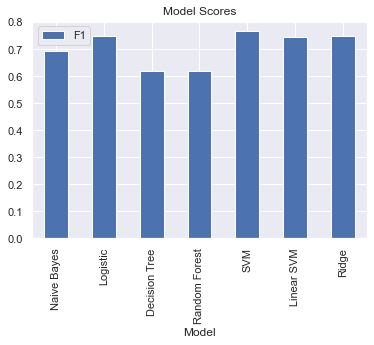

In [58]:
# Next, create a pandas DataFrame containing the precision, recall, and F1 scores for each model.    
    
scores = {
    "Model": ["Naive Bayes", "Logistic", "Decision Tree", "Random Forest", "SVM", "Linear SVM", "Ridge"],
    "F1": [f1_score(y_test, nby_pred, average="micro"), f1_score(y_test, lr_pred, average="micro"),
           f1_score(y_test, dtc_pred, average="micro"), f1_score(y_test, rf_pred, average="micro"), 
           f1_score(y_test, svc_pred, average="micro"), f1_score(y_test, svm_pred, average="micro"),
           f1_score(y_test, rc_pred, average="micro")],
}


df_scores = pd.DataFrame(scores)

# Use the DataFrame.plot.bar method to create the bar chart. 
# This method takes a few optional parameters that you can use to customize the chart, 
# such as the x, y, and title parameters to specify the data to plot, the labels for the axes,
# and the title for the chart, respectively.

ax = df_scores.plot.bar(x="Model", y=["F1"], title="Model Scores")

plt.show()

### 9.2. Assessing Model Performance using Confusion Matrix

A confusion matrix is a table that is used to evaluate the performance of a classification model. The number of rows and columns depend on the number of classes present in our dataset.

A few notes on the matrix:

* The matrix orders the rows and columns in a sorted fashion according to the labels. Our labels are -1, 0, 1 and 2, so the first row/column is -1, and the 2nd row/column is 0 and so on. Let's give it the appropriate labels.

* Each row represents the ground truth totals for Anti, Neutral, Pro, and News tweets. In other words, the sum of all the values in the first row is the total number of observations in our test dataset labelled 'Anti'.

* Each column represents the totals for the predictions in each class of Anti, Neutral, Pro and News tweets. In other words, the sum of all the values in the first column is the total number of predicted observations by the model as 'Anti'

* The intersection of each row/column gives the number of correctly predicted observation for that class.


Confusion matrices are useful for understanding how well a classification model is performing, as they provide a detailed breakdown of the model's predictions. They can be used to calculate a variety of evaluation metrics, such as precision, recall, and accuracy, which can help you understand the strengths and weaknesses of a model.

In [59]:
# Create categorical labels for -1, 0, 1 and 2
labels = ['-1: Anti', '0: Neutral', '1: Pro', '2: News']

In [60]:
#Confusion matrix for Naive Bayes
naive_matrix = pd.DataFrame(data=confusion_matrix(y_test, nby_pred), index=labels, columns=labels)
naive_matrix

,-1: Anti,0: Neutral,1: Pro,2: News
-1: Anti,25,7,235,11
0: Neutral,0,53,354,18
1: Pro,0,9,1671,75
2: News,1,2,254,449


COMET WARNING: The given value of the metric sys.load.avg was None; ignoring


* From the matrix above, there are a total of 25+7+235+11 = 278 Anti tweets present i.e total from first row. Naive bayes model predicted a total of 25+1 = 26 Anti tweets i.e total from first column and only 25 of those predictions are correct. Similar explanations for the other class labels.


In [61]:
#Confusion matrix for LogisticsRegressor
logistics_matrix = pd.DataFrame(data=confusion_matrix(y_test, lr_pred), index=labels, columns=labels)
logistics_matrix

,-1: Anti,0: Neutral,1: Pro,2: News
-1: Anti,91,39,137,11
0: Neutral,8,166,227,24
1: Pro,12,58,1566,119
2: News,4,10,146,546


* From the matrix above, there are a total of 91+39+137+11 = 278 Anti tweets present i.e total from first row. Logistic model predicted a total of 91+8+12+4 = 115 Anti tweets i.e total from first column and only 91 of those predictions are correct. Similar explanations for the other class labels.


In [62]:
#Confusion matrix for DecisionTree 
dtc_matrix = pd.DataFrame(data=confusion_matrix(y_test, dtc_pred), index=labels, columns=labels)
dtc_matrix


,-1: Anti,0: Neutral,1: Pro,2: News
-1: Anti,77,41,133,27
0: Neutral,21,160,201,43
1: Pro,74,171,1260,250
2: News,9,43,195,459


* Out of a total of 278 Anti tweets present i.e total from first row, Decision Tree model predicted a total of 159 Anti tweets  and only 68 of those predictions are correct. 

In [63]:
#Confusion matrix for RandomForest 
rf_matrix = pd.DataFrame(data=confusion_matrix(y_test,rf_pred), index=labels, columns=labels)
rf_matrix

,-1: Anti,0: Neutral,1: Pro,2: News
-1: Anti,77,41,133,27
0: Neutral,21,160,201,43
1: Pro,74,171,1260,250
2: News,9,43,195,459


* Out of a total of 278 Anti tweets present i.e total from first row, Random forest model predicted a total of 159 Anti tweets and only 68 of those predictions are correct. Similar explanations for the other class labels.

In [64]:
#Confusion matrix for Support Vector Machine 
svc_matrix = pd.DataFrame(data=confusion_matrix(y_test,svc_pred), index=labels, columns=labels)
svc_matrix

,-1: Anti,0: Neutral,1: Pro,2: News
-1: Anti,118,32,120,8
0: Neutral,12,172,219,22
1: Pro,9,64,1574,108
2: News,2,10,133,561


* Out of a total of 278 Anti tweets present in the testing data set, SVM model predicted a total of 141 Anti tweets and only 118 of those predictions are correct. Similar explanations for the other class labels.

In [65]:
#Confusion matrix for Linear Support Vector Machine 
svm_matrix = pd.DataFrame(data=confusion_matrix(y_test,svm_pred), index=labels, columns=labels)
svm_matrix

,-1: Anti,0: Neutral,1: Pro,2: News
-1: Anti,127,41,98,12
0: Neutral,17,188,190,30
1: Pro,27,104,1494,130
2: News,4,19,131,552


* Out of a total of 278 Anti tweets present in the testing data set, Linear SVM model predicted a total of 175 Anti tweets and only 127~ of those predictions are correct. Similar explanations for the other class labels.

In [66]:
#Confusion matrix for Ridge 
rc_matrix = pd.DataFrame(data=confusion_matrix(y_test,rc_pred), index=labels, columns=labels)
rc_matrix

,-1: Anti,0: Neutral,1: Pro,2: News
-1: Anti,99,42,123,14
0: Neutral,5,160,229,31
1: Pro,8,56,1551,140
2: News,3,8,134,561


* Out of a total of 278 Anti tweets present in the testing data set, ridge classifier model predicted a total of 114 Anti tweets and only 98 of those predictions are correct. Similar explanations for the other class labels.

* The number of correct predictions for the Pro class is higher in all 7 models, and this has to do with the class imbalance we referred to earlier in the EDA. There are more observations with the Pro label, so the model gets better at classifiying those ones because it has more evidence of them.

* The corresponding values in the other classes are lower for the same reason

#### Explanation of Overall Accuracy from Confusion Matrix

The results shown above lead us to our first classification metric: **overall accuracy**, which we calculate according to the following formula:

$$ Accuracy =  \frac{Correct\space predictions\space in\space all\space classes}{Total\space predictions} $$


$$ Naive-Accuracy =   \frac{ 25 + 53 + 1671 + 449 }{ 3164 } = 0.6946903 $$

$$ Logistics-Accuracy =   \frac{ 91 + 166 + 1566 + 546 }{ 3164 } = 0.7487358 $$

$$ DecisionTree-Accuracy =   \frac{ 68 + 160 + 1248 + 468 }{ 3164 } = 0.6144121 $$

$$ RandomForest-Accuracy =   \frac{  68 + 160 + 1248 + 468 }{ 3164 } = 0.6144121 $$

$$ SVM-Accuracy =   \frac{ 118 + 172 + 1574 + 561 }{ 3164} = 0.7664349 $$

$$ Linear-SVM-Accuracy =   \frac{ 127 + 188 + 1494 + 552 }{ 3164 } = 0.7462073 $$

$$ Ridge-Accuracy =   \frac{ 98 + 160 + 1553 + 561 }{ 3164 } = 0.7496839 $$


At first glance this appears to be a useful, catch-all metric which tells us everything we need to know about our model. The problem is that it lacks detail. It only tells us the overall accuracy but tells nothing about the accuracy of each particular class.

### 9.3. Assessing Model Performance, for 3 models, using the Classification Report 

In [67]:
print('Classification Report For Naive Bayes')
print(classification_report(y_test, nby_pred, target_names=['Anti', 'Neutral', 'Pro', 'News']))

Classification Report For Naive Bayes
              precision    recall  f1-score   support

        Anti       0.96      0.09      0.16       278
     Neutral       0.75      0.12      0.21       425
         Pro       0.66      0.95      0.78      1755
        News       0.81      0.64      0.71       706

    accuracy                           0.69      3164
   macro avg       0.80      0.45      0.47      3164
weighted avg       0.73      0.69      0.64      3164



In [68]:
print('Classification Report For Logistic Model')
print(classification_report(y_test, lr_pred, target_names=['Anti', 'Neutral', 'Pro', 'News']))

Classification Report For Logistic Model
              precision    recall  f1-score   support

        Anti       0.79      0.33      0.46       278
     Neutral       0.61      0.39      0.48       425
         Pro       0.75      0.89      0.82      1755
        News       0.78      0.77      0.78       706

    accuracy                           0.75      3164
   macro avg       0.73      0.60      0.63      3164
weighted avg       0.74      0.75      0.73      3164



In [69]:
print('Classification Report For Support Vector Machine')
print(classification_report(y_test, svc_pred, target_names=['Anti', 'Neutral', 'Pro', 'News']))

Classification Report For Support Vector Machine
              precision    recall  f1-score   support

        Anti       0.84      0.42      0.56       278
     Neutral       0.62      0.40      0.49       425
         Pro       0.77      0.90      0.83      1755
        News       0.80      0.79      0.80       706

    accuracy                           0.77      3164
   macro avg       0.76      0.63      0.67      3164
weighted avg       0.76      0.77      0.75      3164



COMET WARNING: The given value of the metric sys.load.avg was None; ignoring


#### Interpretation

We now have a far more comprehensive view of the performance of our model.

- Clearly, the precision, recall and f1-score values for the Pro class are higher, and this has to do with the class imbalance we referred to earlier in the EDA. There are more observations with the Pro label, so the model gets _better_ at classifiying those ones because it has more evidence of them.

- The corresponding values in the other classes are lower for the same reason.

- The weighted f1-score here gives us a good indication using a single value of how well the model is performed. It is somewhere between the accuracies that the model achieved for each of class , but slightly in favour of class Pro, of which there were more examples.

- Perhaps the most important information in the above table is in the last row, indicating the weighted average. unlike the values in the `macro avg` row which are computed using: $\frac{class\_0\_metric \quad + \quad class\_1\_metric + \quad class\_2\_metric + \quad class\_-1\_metric}{4}$ , the `weighted avg` values are computed using: $\frac{class\_0\_metric \, \times \, \%\_class\_0\_labels  \quad + \quad class\_1\_metric \, \times \, \%\_class\_1\_labels + \quad class\_2\_metric \, \times \, \%\_class\_2\_labels + \quad class\_-1\_metric \, \times \, \%\_class\_-1\_labels}{4}$ , which takes into account the proportions of each class fed into the model (as indicated in the support column).

<a id="ten"></a>
## 10. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

**HOW OUR MODEL WORKS!**

<img src="https://imgs.search.brave.com/ybiWe82h0sdQRbZJEMWV3sNRCvZHHux_rxtkuKNcVLg/rs:fit:900:604:1/g:ce/aHR0cDovL3d3dy5s/aWZlY3ljbGVpbnNp/Z2h0cy5jb20vd3At/Y29udGVudC91cGxv/YWRzLzIwMTYvMDQv/cGFydC1hbmQtZHJh/d2luZy5wbmc" width="400">


#### 10.1 Multinomial Naive Bayes

> _Non-technical summary_:
Naive Bayes is a way of using math to make predictions about data. It is called "naive" because it assumes that the different factors that can affect the outcome of a situation are independent of each other. This assumption might not always be true, but the algorithm is often still very accurate. It is often used to classify things into different groups.

> _Technical summary_:
Naive Bayes is a supervised learning algorithm that is commonly used for classification tasks. It uses Bayes' theorem, which is a way of calculating the probability of an event based on prior knowledge of conditions that might be related to the event. In the context of the algorithm, this means that we can use the observed features of a data point to calculate the probability that it belongs to a certain class. The "naive" part of the algorithm comes from the assumption that all of the features are independent of each other, which allows us to simplify the calculations. Despite this assumption, the algorithm often performs well in practice.

#### 10.2 Logistic Regression

> _Non-technical summary_:
Logistic regression is a way of using math to make predictions about data. It is often used to classify things into different groups, such as "spam" or "not spam" for emails, or "malignant" or "benign" for tumors. It works by taking some information about an input, and using it to calculate the probability that the input belongs to a certain group. It then uses a threshold value to decide which group the input should belong to.

> _Technical summary_:
Logistic regression is a supervised learning algorithm that is commonly used for classification tasks. It works by using a linear model to predict the probability that an input belongs to a certain class. This probability is calculated using a logistic function, which maps the input values to a value between 0 and 1. The class that the input is assigned to is then determined using a threshold value; for example, if the probability is greater than 0.5, the input might be classified as belonging to the "positive" class, and if it is less than 0.5, it might be classified as belonging to the "negative" class. The model is trained using a set of labeled examples, and can then be applied to new, unseen data to make predictions.

#### 10.3 Decision Tree

> _Non-technical summary_:
A decision tree is a tool that can help us make predictions about data. It does this by breaking the data into smaller and smaller groups, and then using those groups to make predictions. This lets us see how different factors might affect the outcome of a situation, and helps us make more accurate predictions.

> _Technical summary_:
A decision tree is a supervised learning algorithm that can be used for both classification and regression tasks. It works by constructing a tree-like model from an input dataset, where each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label or a predicted value. The algorithm uses a top-down, greedy search approach to find the optimal decision tree that maximizes a given criterion, such as information gain or Gini impurity.

#### 10.4 Random Forest

> Non-technical summary: A random forest model can be thought of as a group of individual decision trees that work together to make predictions. Each tree makes its own prediction, and the final prediction is made by combining the predictions of all of the trees. This approach helps to improve the accuracy of the model by reducing overfitting and using a variety of different perspectives to make a prediction.

> _Technical summary_: The working principle of a random forest model can be explained as follows:
1.The dataset is split into multiple subsets, and a decision tree is trained on each subset.
2.The features in the data are also randomly subsampled for each tree. This means that each tree is trained on a different subset of the features in the data.
3.During training, each decision tree is constructed using a greedy algorithm, where at each step the best split is chosen based on some metric (e.g., Gini impurity or entropy).
4.The final prediction for a new sample is made by averaging the predictions of all of the individual decision trees (for regression tasks) or by taking a majority vote (for classification tasks).

* The randomness in the subsampling of the data and the features helps to improve the generalization performance of the model by reducing overfitting.





#### 10.5  Support Vector Machine

> _Non-technical summary_:
Imagine you have a dataset with two classes of points, "A" and "B." An SVM will find the line that best separates these points into classes "A" and "B." Points on one side of the line will be classified as "A," and points on the other side will be classified as "B."

* Technical summary:

Our model works by finding an optimal boundary/line that successfully classifies the data points into their respective classes.
To better understand this, we'll quickly explain two terms; _hyperplane_ and _support vectors_ .

* **Hyper-Plane** : A hyperplane is a decision boundary that differentiates classes in SVM. A data point falling on either side of the hyperplane can be attributed to different classes. 

* **Support-Vectors** : Support vectors are the data points that are nearest to the hyper-plane. We have to select a hyperplane, for which the margin, i.e the distance between support vectors and hyper-plane is maximum.
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/support-vector.png" width="300">

Let's say we have a classification problem where we have to separate the red data points from the blue ones using a hyperplane. As shown in the image below, we have multiple lines separating the data points successfully. But our objective is to look for the **best line** that separate these datapoints equally.
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-08-13-18-50.png" width="300">

1. The **best line** must be able to successfully divide all the data points into the respective classes. In our example, we can clearly see lines E and D are miss classifying a red data point, so we drop them. 

2. The **best line** must perfectly separate the data points in such a way that both classes are at equidistant from the line. 
<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2021/03/Screenshot-from-2021-03-08-13-34-04.png" width="300">

> This is what Support Vector Classifier looks for. It aims for the maximum margin and creates a line that is equidistant from both sides, which is line C in our case. So we can say C represents the Support Vector Machine classifier with the maximum margin. This way our model is able to correctly classifier the tweets. 

---

#### 10.6 Linear Support Vector Machine

> _Non-technical summary_:
A linear SVM is an algorithm that finds the best line (in two dimensions) or hyperplane (in multiple dimensions) to separate the data points in a dataset into their respective classes. This line or hyperplane is known as the "decision boundary," and it is used to classify new data points.

> _Technical summary_:
A linear SVM finds the decision boundary by constructing a hyperplane that maximally separates the data points in the dataset. This is done by finding the hyperplane that has the largest margin, or the maximum distance between the hyperplane and any data point in the dataset. The points that are closest to the hyperplane are called "support vectors," and they define the position and orientation of the hyperplane. Because a linear SVM uses a linear kernel function, the decision boundary will always be a straight line or hyperplane. Once the decision boundary has been found, new data points can be easily classified by determining on which side of the hyperplane they lie.

#### 10.7 Ridge Classifier

> _Non-technical summary_:
A ridge classifier is an algorithm that helps to prevent overfitting by adding a regularization term to the model. This regularization term reduces the complexity of the model and can improve the accuracy of the classifier on new data.

> _Technical summary_:
A ridge classifier is a linear model that uses a regularization term in the cost function to prevent overfitting. This regularization term is a hyperparameter that is multiplied by the squared magnitude of the model weights, which penalizes large weights and encourages the model to use only the most relevant features in the data. During training, the model seeks to minimize the cost function, which balances the fit of the model on the training data and the regularization term. The regularization term helps to prevent overfitting by limiting the complexity of the model, which can improve the generalizability of the classifier.

<a id="eleven"></a>
## 11. Logging parameters on Comet
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

**Create a dictionary for the data we want to log**

In [70]:
params = {"random_state": 42,
         "model_type": "naive_bayes",
          "vectorizer": "tfidf",
          "stratify": True
         }

metrics = {"f1": f1_score(y_test, nby_pred, average="micro"),
          "recall": recall_score(y_test, nby_pred, average="micro"),
          "precision": precision_score(y_test, nby_pred, average="micro")
          }

In [74]:
params_1 = {"random_state": 42,
         "model_type": "logistic",
          "vectorizer": "tfidf",
          "stratify": True
         }

metrics_1 = {"f1": f1_score(y_test, lr_pred, average="micro"),
          "recall": recall_score(y_test, lr_pred, average="micro"),
          "precision": precision_score(y_test, lr_pred, average="micro")
          }

In [78]:
params_2 = {"random_state": 42,
         "model_type": "decision tree",
          "vectorizer": "tfidf",
          "stratify": True
         }

metrics_2 = {"f1": f1_score(y_test, dtc_pred, average="micro"),
          "recall": recall_score(y_test, dtc_pred, average="micro"),
          "precision": precision_score(y_test, dtc_pred, average="micro")
          }

In [82]:
params_3 = {"random_state": 42,
         "model_type": "random forest",
          "vectorizer": "tfidf",
          "stratify": True
         }

metrics_3 = {"f1": f1_score(y_test, rf_pred, average="micro"),
          "recall": recall_score(y_test, rf_pred, average="micro"),
          "precision": precision_score(y_test, rf_pred, average="micro")
          }

In [86]:
params_4 = {"random_state": 42,
         "model_type": "svm",
          "vectorizer": "tfidf",
          "stratify": True
         }

metrics_4 = {"f1": f1_score(y_test, svc_pred, average="micro"),
          "recall": recall_score(y_test, svc_pred, average="micro"),
          "precision": precision_score(y_test, svc_pred, average="micro")
          }

In [90]:
params_5 = {"random_state": 42,
         "model_type": "linear svm",
          "vectorizer": "tfidf",
          "stratify": True
         }

metrics_5 = {"f1": f1_score(y_test, svm_pred, average="micro"),
          "recall": recall_score(y_test, svm_pred, average="micro"),
          "precision": precision_score(y_test, svm_pred, average="micro")
          }

In [94]:
params_6 = {"random_state": 42,
         "model_type": "ridge",
          "vectorizer": "tfidf",
          "stratify": True
         }

metrics_6 = {"f1": f1_score(y_test, rc_pred, average="micro"),
          "recall": recall_score(y_test, rc_pred, average="micro"),
          "precision": precision_score(y_test, rc_pred, average="micro")
          }

**Log the parameters and result**

In [71]:
# Log of parameters for naive bayes
experiment.log_parameters(params)
experiment.log_metrics(metrics)
experiment.log_confusion_matrix(y_test, nby_pred)

{'web': 'https://www.comet.com/api/asset/download?assetId=026bd24666f44a6a848ae39bd560771b&experimentKey=f7a997fa77b44e4486efbed46a78d149',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=026bd24666f44a6a848ae39bd560771b&experimentKey=f7a997fa77b44e4486efbed46a78d149',
 'assetId': '026bd24666f44a6a848ae39bd560771b'}

In [75]:
# Log of parameters for logistic
experiment.log_parameters(params_1)
experiment.log_metrics(metrics_1)
experiment.log_confusion_matrix(y_test, lr_pred)

{'web': 'https://www.comet.com/api/asset/download?assetId=c161ab81f5d64ca0a648993dd93827a9&experimentKey=376d4cf2b74947eaa6cde8491dd9ec34',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=c161ab81f5d64ca0a648993dd93827a9&experimentKey=376d4cf2b74947eaa6cde8491dd9ec34',
 'assetId': 'c161ab81f5d64ca0a648993dd93827a9'}

In [79]:
# Log of parameters for decision tree
experiment.log_parameters(params_2)
experiment.log_metrics(metrics_2)
experiment.log_confusion_matrix(y_test, dtc_pred)

{'web': 'https://www.comet.com/api/asset/download?assetId=072503e4bb4b413481f32377ed895380&experimentKey=17ca726f55d54bedb8eaf0f17b5b3794',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=072503e4bb4b413481f32377ed895380&experimentKey=17ca726f55d54bedb8eaf0f17b5b3794',
 'assetId': '072503e4bb4b413481f32377ed895380'}

In [83]:
# Log of parameters for random forest
experiment.log_parameters(params_3)
experiment.log_metrics(metrics_3)
experiment.log_confusion_matrix(y_test, rf_pred)

{'web': 'https://www.comet.com/api/asset/download?assetId=cccc7d2d03c044eeb8acfc9d380353a1&experimentKey=146b1c14de8847d0bd430e95c9e038b9',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=cccc7d2d03c044eeb8acfc9d380353a1&experimentKey=146b1c14de8847d0bd430e95c9e038b9',
 'assetId': 'cccc7d2d03c044eeb8acfc9d380353a1'}

In [87]:
# Log of parameters for svc
experiment.log_parameters(params_4)
experiment.log_metrics(metrics_4)
experiment.log_confusion_matrix(y_test, svc_pred)

{'web': 'https://www.comet.com/api/asset/download?assetId=d008b5a94bbc4693a982a075b737e627&experimentKey=738a4661b74b42c6a9c062acaf9333bf',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=d008b5a94bbc4693a982a075b737e627&experimentKey=738a4661b74b42c6a9c062acaf9333bf',
 'assetId': 'd008b5a94bbc4693a982a075b737e627'}

In [91]:
# Log of parameters for linear svm
experiment.log_parameters(params_5)
experiment.log_metrics(metrics_5)
experiment.log_confusion_matrix(y_test, svm_pred)

{'web': 'https://www.comet.com/api/asset/download?assetId=e63117f60bb44f50a0751c4a5288a88b&experimentKey=d0ebbe182d8f4559a05b4f0d8ac9cbaa',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=e63117f60bb44f50a0751c4a5288a88b&experimentKey=d0ebbe182d8f4559a05b4f0d8ac9cbaa',
 'assetId': 'e63117f60bb44f50a0751c4a5288a88b'}

In [95]:
# Log of parameters for ridge
experiment.log_parameters(params_6)
experiment.log_metrics(metrics_6)
experiment.log_confusion_matrix(y_test, rc_pred)

{'web': 'https://www.comet.com/api/asset/download?assetId=237d1c01e36643119bf8bc4074b82880&experimentKey=9a5cc27854c94d10b491483eef335734',
 'api': 'https://www.comet.com/api/rest/v2/experiment/asset/get-asset?assetId=237d1c01e36643119bf8bc4074b82880&experimentKey=9a5cc27854c94d10b491483eef335734',
 'assetId': '237d1c01e36643119bf8bc4074b82880'}

**End experiment**

In [97]:
# end the expereiment
experiment.end()

**Display experiment**

Running experiment.display() will show you your experiments comet.ml page inside your notebook

In [98]:
# display the experiment
experiment.display()

<a id="twelve"></a>
## 12. Pickling of models and vectorizer 
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

### Pickle three of the models for use on streamlit

In [106]:
# Pickle for LogisticRegressor
model_save_path = "logistics_regression.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(lr,file)
    
#Pickle for DecisionForest Regressor
model_save_path = "dtc_regression.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(dtc,file)
    
#Pickle for DecisionForest Regressor
model_save_path = "svm_regression.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(svm,file)

### Pickle the Vectorizer for use on streamlit

In [107]:
#Pickle the TFIDF vectorizer
model_save_path = "TFIDF.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(vectorizer,file)

<a id="thirteen"></a>
## 13. Conclusion
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

In this project, seven (7) machine learning models were trained for a tweet sentiment task. The performance of the models was evaluated using the f1 score, precisiona and recall and it was found that the **Support Vector Machine** model performed better than the other 6 models. This suggests that the **Support Vector Machine** model may be a good choice for this particular tweet polarity analysis. Further evaluation and testing may be needed to confirm this, but the initial results, based on the classification report given above for all seven (7) models judging by their respective f1 scores, indicate that the **Support Vector Machine** model is a strong performer in this domain.

Going by all of the above considerations, our winning model for this project is the **Support Vector Classifier** because it has the highest weighted average for precision, recall and f1 score.

With this model,  decision makers can known the prevailing sentiments from a particular area through analysing the statements from respondents living in a particular area. Armed with this knowledge, informed decisons on allocation of resources can be made, and ad and marketing strategies for different product that favours climate change can be put into action. 

The speech writing industry can also benefit greatly from product developed with this model. Imagine a politician or business executive that wants to bring in a policy about climate change, the executuve or politician can analyse his or her speech before hand to know the sentiment that the speech will arouse in his or her listeners and necessary corrections can be made to suit their agenda. 

## Test on Unseen Dataset for Kaggle submission

In [108]:
X_tests = vectorizer.transform(df_test['clean_message']).toarray()
test_new = pd.DataFrame(X_tests, columns=vectorizer.get_feature_names())
print(test_new.shape)

(10546, 6103)


In [109]:
X_test = test_new.values
svc_pred = svc.predict(X_test)

In [110]:
# Preparing csv file for Kaggle submission 
submission = pd.DataFrame()
submission['tweetid'] = df_test['tweetid']
submission['sentiment'] = svc_pred
submission.to_csv('tweet_submission.csv', index=False)

# Validate
submission = pd.read_csv('tweet_submission.csv')

<a id="fourteen"></a>
## 14. References
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Project Pipeline</a>

1. Wikipedia contributors. (2022, December 5). Exploratory data analysis. In Wikipedia, The Free Encyclopedia. Retrieved 03:31, December 9, 2022, from https://en.wikipedia.org/w/index.php?title=Exploratory_data_analysis&oldid=1125714900

2. BoostLabs (2020, June 22). Word Clouds & the Value of Simple Visualizations. https://boostlabs.com/blog/what-are-word-clouds-value-simple-visualizations/

3. Lawtomated. (2021, Nov 15). 4 things you need to know about AI: accuracy, precision, recall and F1 scores. https://lawtomated.com/accuracy-precision-recall-and-f1-scores-for-lawyers/

4. Analyticsvidhya.com. (2021, March 8). Beginners Guide To Support Vector Machine svm/ https://www.analyticsvidhya.com/blog/2021/03/beginners-guide-to-support-vector-machine-svm/

5. George Lawton. (2020, March 27). How to optimize hyperparameter tuning for machine learning models. https://searchenterpriseai.techtarget.com/feature/How-to-optimize-hyperparameter-tuning-for-machine-learning-mo

6. Hayley Dorney. (2021, October 10) How to create and use hashtags. Retrieved 12:53, December 11, 2022.
https://business.twitter.com/en/blog/how-to-create-and-use-hashtags.html

7. ANAMIKA THANDA (2022, February 15) What is Logistic Regression? A Beginner's Guide, UPDATED ON DECEMBER 7, 2022
https://careerfoundry.com/en/blog/data-analytics/what-is-logistic-regression/

8. Decision Tree - GeeksforGeeks https://www.geeksforgeeks.org/decision-tree/

9. Multinomial Naive Bayes Explained: Function, Advantages & Disadvantages, Applications in 2023 | upGrad blog by Shriram Last Updated: Oct 3, 2022 https://www.upgrad.com/blog/multinomial-naive-bayes-explained/

10.  Towards Data Science. (Apr 23, 2019) Ensemble methods: bagging, boosting and stacking by Joseph Rocca. 
https://towardsdatascience.com/ensemble-methods-bagging-boosting-and-stacking-c9214a10a205

11. Towards Data Science by Destin Gong. (2022, Feb 23) Top 6 Machine Learning Algorithms for Classification https://towardsdatascience.com/top-machine-learning-algorithms-for-classification-2197870ff501

12. Medium by Avinash Navlani. (2020, Aug 16) Support Vector Machine Classification in Scikit-learn https://avinashnavlani.medium.com/support-vector-machine-classification-in-scikit-learn-3800bc4979ce)

